# <center> Random Forest Classification

### Import Digits dataset from sklearn

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

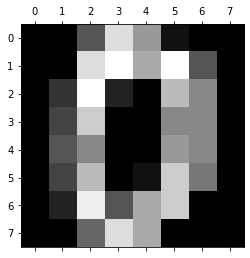

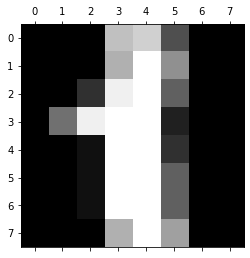

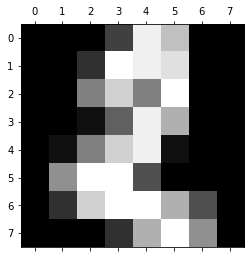

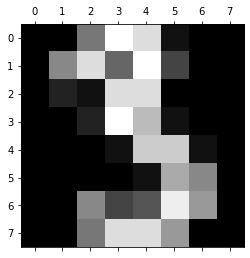

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [4]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, digits.target, test_size=0.33, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 3)

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
model.score(X_test, y_test)

0.8535353535353535

In [40]:
y_predicted = model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  1,  1,  1,  0,  0,  2,  0],
       [ 0,  0, 50,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  3, 45,  0,  1,  0,  0,  2,  0],
       [ 2,  3,  0,  1, 57,  0,  0,  1,  0,  0],
       [ 3,  1,  1,  3,  4, 57,  1,  0,  0,  3],
       [ 1,  0,  0,  0,  0,  2, 54,  0,  0,  0],
       [ 1,  2,  0,  1,  1,  0,  0, 57,  0,  0],
       [ 6,  6,  4,  1,  0,  1,  1,  1, 31,  1],
       [ 0,  4,  4,  4,  3,  0,  0,  1,  0, 52]], dtype=int64)

Text(69.0, 0.5, 'Truth')

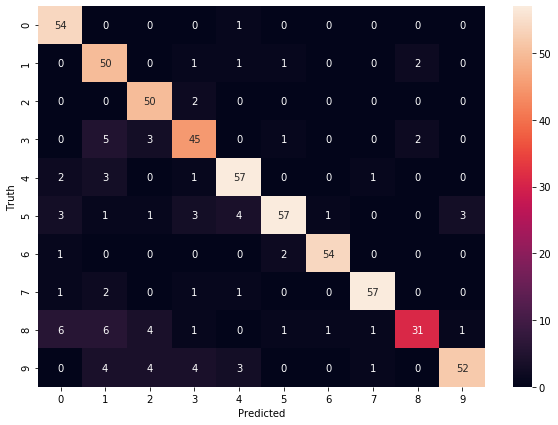

In [45]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')